In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from data import HFFH_ViT_Data
from loss import Loss
from model import  HFFH_ViT, HFFH_ViT_S
from trainer import Trainer
from saved import Saver

In [2]:
print(torch.cuda.get_device_name(0))

args = {}
# model
args['precision'] = "single"
args['device'] = torch.device("cuda:0")
args['image_size'] = (256, 256)
args['patch_size'] = (16, 16)
args['dims'] = [8, 8, 16]
#args['dims'] = [96, 120, 144]
#the last channel argument determines the amount of output channels. SET = 1
args['channels'] = [16, 16, 16, 16, 16, 16, 16, 16, 32, 32, 1]
#args['channels'] = 16
#args['channels'] = [16, 32, 48, 48, 64, 64, 80, 80, 96, 96, 1]
args['expansion'] = 1
args['kernel_size'] = 3
args['depths'] = (2, 4, 3)
args['in_channels'] = 1

# loss function
args['loss'] = "1*L1"  # loss functions separated by '+', each loss function has [weight]*[loss_type]

# trainer
args['optimizer'] = "ADAM"
args['lr'] = 1e-4
args['weight_decay'] = 0
#args['decay'] = "10-20-30-50-75-100-150-200"   # Decay milestones
args['decay'] = "30"   # Decay milestones
args['gamma'] = 0.5     # Decay factor at each milestone
args['betas'] = (0.9, 0.999)
args['epsilon'] = 1e-8
args['print_every'] = 0 # 0 = never
args['epochs'] = 1e8
args['batch_size'] = 2

NVIDIA GeForce RTX 3090


In [3]:
d = HFFH_ViT_Data(args)
#d.create_train_dataset()
#d.create_test_dataset()
d.Load("./data/data4096_w_test256.hffh")

In [4]:
s = Saver()
args, m, l, t = s.Load(d, HFFH_ViT, Loss, Trainer, "./saved/hffh_ViT_v31.tar")

Created HFFH_ViT Model
Making the trainer...
Loaded model from: ./saved/hffh_ViT_v31.tar


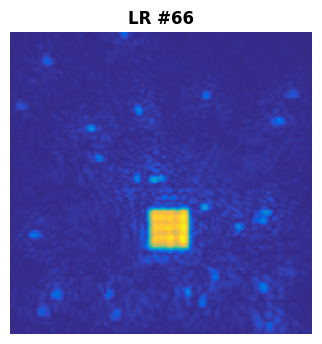

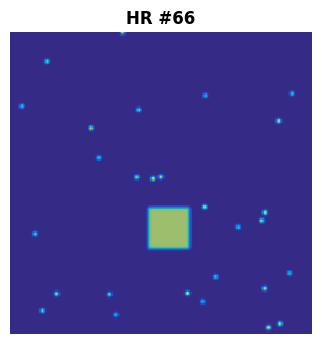

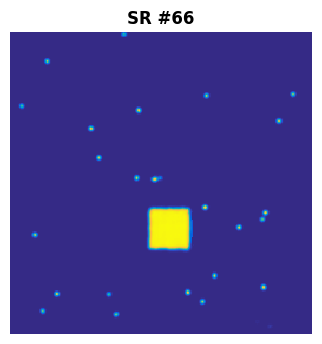

In [9]:
d.test_net(m, args)

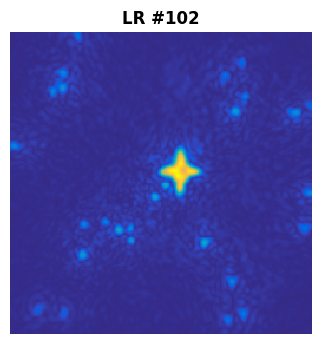

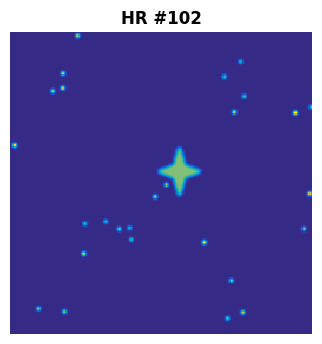

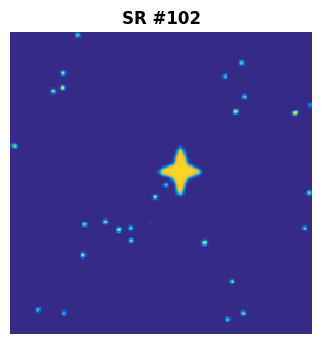

In [6]:
d.test_net(m, args, 102, save_name="test102")

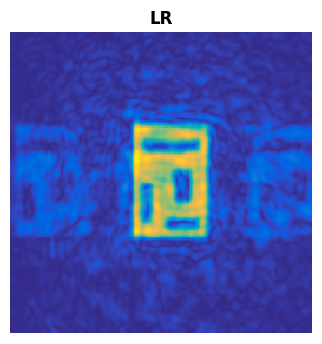

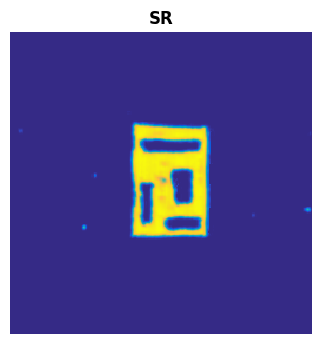

In [26]:
d.test_net_real(m, args, "exp1_cutout2_2", scale=0.0007, save_name="test_exp1")

In [7]:
m

HFFH_ViT(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): SiLU()
  )
  (stem): ModuleList(
    (0): MV2Block(
      (conv): Sequential(
        (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
        (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): SiLU()
        (3): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (1): MV2Block(
      (conv): Sequential(
        (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
        (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): SiLU()
        (3): Conv2d(16, 16, kernel_size=(1, 1), 